# Reporte de Práctica 10: Clasificación de datos con sklearn

Para esta práctica solamente trabajamos con los datos del año 2017 para clasificar la categoría a la que pertenecen los cortos tomando como base la edad y sexo del concursante y el género del corto. 
Utilizaremos los[clasificadores de scikit-learn](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) y la distribución de los datos que vamos a usar serán 60% para entrenar y 40% para validar. 

## Objetivos 

* Utiliza por lo menos tres distintos métodos de clasificación 
* Por lo menos una división de interés en tus datos

## Preparación de los datos

Primero tomamos los archivos originales y los procesamos fuera de la nube, producto de esta limpieza se generó el archivo "clasificacion2017.csv"

Para poder trabajar importaremos las librerias necesarias y cargaremos el documento .csv

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from numpy import isnan, nan
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

df = pd.read_csv("https://raw.githubusercontent.com/SamatarouKami/CIENCIA_DE_DATOS/master/clasificacion2017.csv")

/usr/lib/python2.7/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Categorización de los campos

Como tenemos campos con cadenas de caracteres utilizaremos la Categorización por defecto de pandas, y generaremos una columna con la etiqueta que utlizaremos para la clasificación.

In [11]:
gen = pd.Categorical(df['Género'])
df['Género'] = gen.codes

pai = pd.Categorical(df['País'])
df['País'] = pai.codes

sex = pd.Categorical(df.Sexo) 
df.Sexo = pai.codes

df['etiquetas'] = [1 if df['Categoría'][i] == 'Juvenil' else 0 for i in df['Categoría'].keys()]# Clasificar Categorias
print(df.etiquetas.value_counts())

SyntaxError: invalid syntax (<ipython-input-11-dbf01bc04159>, line 1)

Preparamos las variables que necesitamos para preparar el clasificador y además aplicamos un PCA, como debió haberse hecho en la práctica 8.

In [5]:
y = df.etiquetas

xVars = ['Edad', 'Sexo', 'Género'] 
x = df.loc[:, xVars].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components = 2) # pedimos uno bidimensional
X = pca.fit_transform(x)

AttributeError: 'DataFrame' object has no attribute 'etiquetas'

In [7]:

xVars = ['Edad', 'Sexo', 'Género'] 
x = df.loc[:, xVars].values

pca = PCA(n_components = 2) # pedimos uno bidimensional
X = pca.fit_transform(x)
from math import ceil, sqrt
from numpy import isnan, nan, arange, meshgrid, c_
import matplotlib.pyplot as plt
h=0.2
# código de https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html 
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process", \
         "Decision Tree", "Random Forest", "AdaBoost", "Naive Bayes"]
classifiers = [KNeighborsClassifier(3), SVC(kernel="linear", C=0.025), \
    SVC(gamma=2, C=1), GaussianProcessClassifier(1.0 * RBF(1.0)), \
    DecisionTreeClassifier(max_depth=5), RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1), \
    AdaBoostClassifier(), GaussianNB()]
k = int(ceil(sqrt(len(classifiers) + 1)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42) # división
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = meshgrid(arange(x_min, x_max, h), arange(y_min, y_max, 0.02))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.rcParams["figure.figsize"] = [16, 16]
figure = plt.figure()
ax = plt.subplot(k, k, 1)
ax.set_title("Datos de entrada")
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.2, edgecolors='k') # entrenamiento
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.2, edgecolors='k') # validación
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i = 2
for name, clf in zip(names, classifiers):
    ax = plt.subplot(k, k, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.3f' % score).lstrip('0'), size=40, horizontalalignment='right')
    i += 1
plt.tight_layout()
plt.show()

ValueError: invalid literal for float(): 47    

Como se puede ver aqui en el sklearn no funcionó con jupyter notebook asi que decidí hacer el codigo en un block de notas y corrí todo en la terminal de Ubuntu 18 obteniendo los siguientes graficos con diferentes metodos

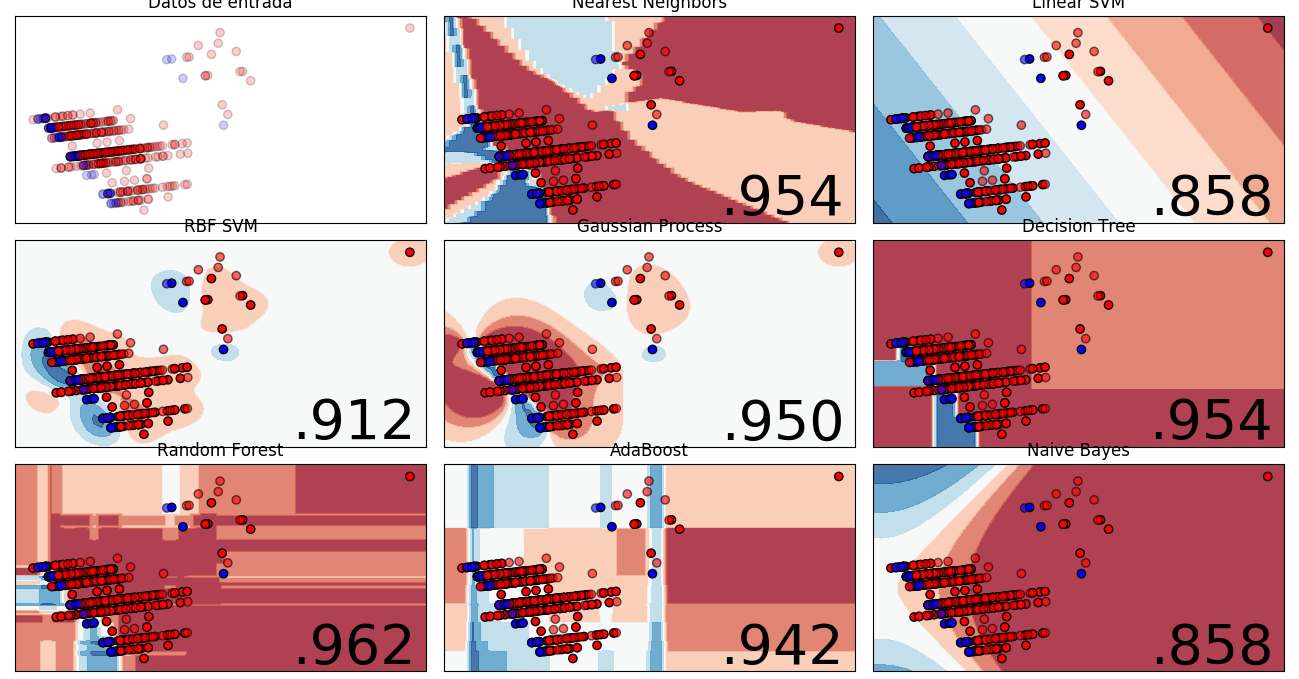

In [13]:
from IPython.display import Image
Image("Figure_1.png")

Ahora calcularemos las matrices de confusión.
Este fue el código que utilicé:

In [ ]:
# código de https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html 
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process", \
         "Decision Tree", "Random Forest", "AdaBoost", "Naive Bayes"]
classifiers = [KNeighborsClassifier(3), SVC(kernel="linear", C=0.025), \
    SVC(gamma=2, C=1), GaussianProcessClassifier(1.0 * RBF(1.0)), \
    DecisionTreeClassifier(max_depth=5), RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1), \
    AdaBoostClassifier(), GaussianNB()]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42) # la misma división

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    print(name, clf.score(X_test, y_test))
    expected, predicted = y_test, clf.predict(X_test)
    print(metrics.classification_report(expected, predicted))
    print(metrics.confusion_matrix(expected, predicted))
    print('-' * 60)

Obteniendo los siguientes resultados




______________________________________________________________________________________________________________________
/home/samataroukami/.local/lib/python3.6/site-packages/sklearn/externals/joblib/externals/cloudpickle/cloudpickle.py:47: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
0    521
1    128
Name: etiquetas, dtype: int64
/home/samataroukami/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/samataroukami/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
Nearest Neighbors 0.9538461538461539
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       223
           1       0.79      0.92      0.85        37

   micro avg       0.95      0.95      0.95       260
   macro avg       0.89      0.94      0.91       260
weighted avg       0.96      0.95      0.96       260

[[214   9]
 [  3  34]]
------------------------------------------------------------
Linear SVM 0.8576923076923076
/home/samataroukami/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       223
           1       0.00      0.00      0.00        37

   micro avg       0.86      0.86      0.86       260
   macro avg       0.43      0.50      0.46       260
weighted avg       0.74      0.86      0.79       260

[[223   0]
 [ 37   0]]
------------------------------------------------------------
RBF SVM 0.9115384615384615
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       223
           1       0.63      0.92      0.75        37

   micro avg       0.91      0.91      0.91       260
   macro avg       0.81      0.91      0.85       260
weighted avg       0.93      0.91      0.92       260

[[203  20]
 [  3  34]]
------------------------------------------------------------
/home/samataroukami/.local/lib/python3.6/site-packages/sklearn/gaussian_process/gpc.py:434: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1.45960984,  8.20994214]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 184, 'nit': 14, 'warnflag': 2}
  ConvergenceWarning)
Gaussian Process 0.9615384615384616
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       223
           1       0.79      1.00      0.88        37

   micro avg       0.96      0.96      0.96       260
   macro avg       0.89      0.98      0.93       260
weighted avg       0.97      0.96      0.96       260

[[213  10]
 [  0  37]]
------------------------------------------------------------
Decision Tree 0.9538461538461539
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       223
           1       0.79      0.92      0.85        37

   micro avg       0.95      0.95      0.95       260
   macro avg       0.89      0.94      0.91       260
weighted avg       0.96      0.95      0.96       260

[[214   9]
 [  3  34]]
------------------------------------------------------------
Random Forest 0.9615384615384616
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       223
           1       0.80      0.97      0.88        37

   micro avg       0.96      0.96      0.96       260
   macro avg       0.90      0.97      0.93       260
weighted avg       0.97      0.96      0.96       260

[[214   9]
 [  1  36]]
------------------------------------------------------------
AdaBoost 0.9423076923076923
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       223
           1       0.78      0.84      0.81        37

   micro avg       0.94      0.94      0.94       260
   macro avg       0.87      0.90      0.89       260
weighted avg       0.94      0.94      0.94       260

[[214   9]
 [  6  31]]
------------------------------------------------------------
Naive Bayes 0.8576923076923076
/home/samataroukami/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       223
           1       0.00      0.00      0.00        37

   micro avg       0.86      0.86      0.86       260
   macro avg       0.43      0.50      0.46       260
weighted avg       0.74      0.86      0.79       260

[[223   0]
 [ 37   0]]
------------------------------------------------------------



## Conclusión
Como se puede apreciar en la gráfica y en las matrices de confusión los 3 mejores metodos para clasificar los datos son 

* Random Forest
* Nearest Neighbors
* Gaussian Process

obteniendo valores por encima del 95% de precisión.


--29 de Abril 2019--
Luis Angel Gutierrez Rodriguez 1484412